<h3 style="text-align:center;">ESCUELA POLITÉCNICA NACIONAL</h3>
<h3 style="text-align:center;">FACULTAD DE INGENIERÍA EN SISTEMAS</h3>
<h3 style="text-align:center;">METODOS NUMERICOS ICCD412 </h3>
<h3 style="text-align:center;">Taller 02 Cálculo de Raices</h3>


*JUAN FRANCISCO PINTO ANDRANGO*

*GR1CC*

*FECHA DE ENTREGA 28 DE OCUTBRE DEL 2025*

*En este taller relacionado al cálculo de raíces, grafica de funciones, método de Newton y método de Bisección se utilizaron las siguientes librerias*

*-import numpy as np- : se uso para calculos numricos y manejo de areglos con matrices y vectores, optimo para trabajr con funciones y simulaciones.*

*-import matplotlib.pyplot as plt- : enfocado en la creacion de graficas con curvas, puntos, barrras.*

*-from scipy import optimize- : centrado en resolver problemas en ecuaciones y optimización util para trabajar con método de Newton y método de Bisección he ideal para ejercicios matematicos donde no hay solucion analitica.*

*-from matplotlib.animation import FuncAnimation- : compatible con Matplotlib en creacion de animacion de graficos permite visualizar actualizaciones en graficas de manera repetitiva tambbien util para visualizar los metodos de Newton y Bisección.*



*1. Encuentre todas las raices del polinomio* 



*La ecuación es:*


$ x^4 + 540x^3 + 109124x^2 + 9781632x + 328188672 = 0 $




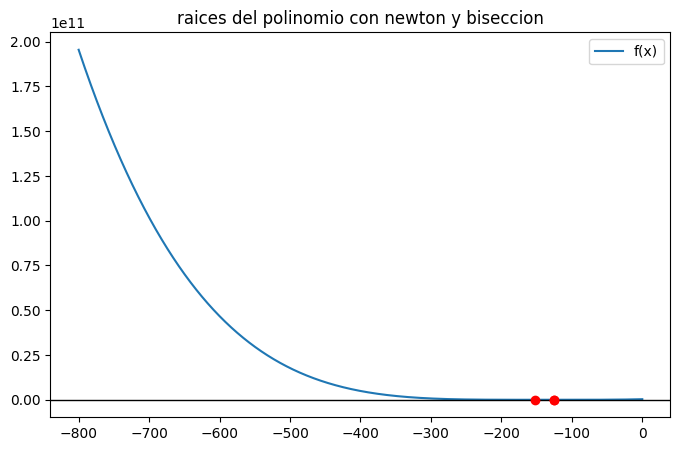

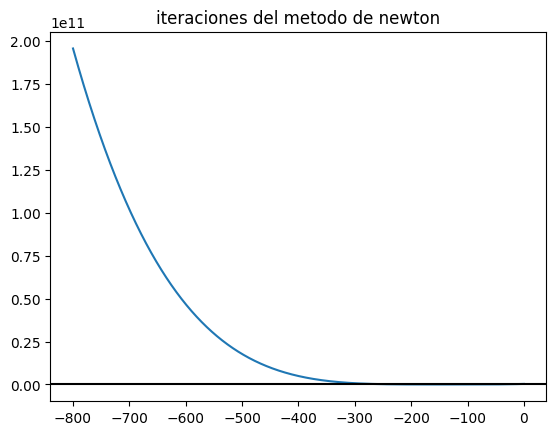

raices aproximadas: [np.float64(-152.0), np.float64(-126.00001), np.float64(-126.0)]


In [7]:

import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from matplotlib.animation import FuncAnimation

def f(x):
    return x**4 + 540*x**3 + 109124*x**2 + 9781632*x + 328188672 #polinomio

def df(x):
    return 4*x**3 + 1620*x**2 + 218248*x + 9781632 # Derivada 

# grafico
x = np.linspace(-800, 0, 5000)
y = f(x)


raices_newton = []
raices_biseccion = []

for r in [-600, -300, -100, -10]:
    try:
        rn = optimize.newton(f, r, fprime=df)
        if np.isreal(rn):
            raices_newton.append(np.real(rn))
    except:
        pass

for a, b in [(-700, -500), (-500, -200), (-200, 0)]:
    try:
        rb = optimize.bisect(f, a, b)
        raices_biseccion.append(rb)
    except:
        pass

raices_total = sorted(set(np.round(raices_newton + raices_biseccion, 5)))

# grafico

fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(x, y, label="f(x)")
ax.axhline(0, color='k', lw=1)
for r in raices_total:
    ax.scatter(r, 0, color='red', zorder=5)
ax.legend()
ax.set_title("raices del polinomio con newton y biseccion")
plt.show()


x0 = -500  # valor inicial
xn = [x0]
for _ in range(10):
    x1 = x0 - f(x0)/df(x0)
    xn.append(x1)
    x0 = x1

fig, ax = plt.subplots()
ax.plot(x, y, label='f(x)')
ax.axhline(0, color='black')
line, = ax.plot([], [], 'ro-')
ax.set_title("iteraciones del metodo de newton")

def update(i):
    line.set_data(xn[:i], [f(xx) for xx in xn[:i]])
    return line,

ani = FuncAnimation(fig, update, frames=len(xn), interval=700, blit=True)
plt.show()

print("raices aproximadas:", raices_total)



*2. Encuentre todos los puntos en los que la curva*

$ (y/2)^2 = ((x+3/2)^2$ - 1 )

*interseca el eje y=-2*

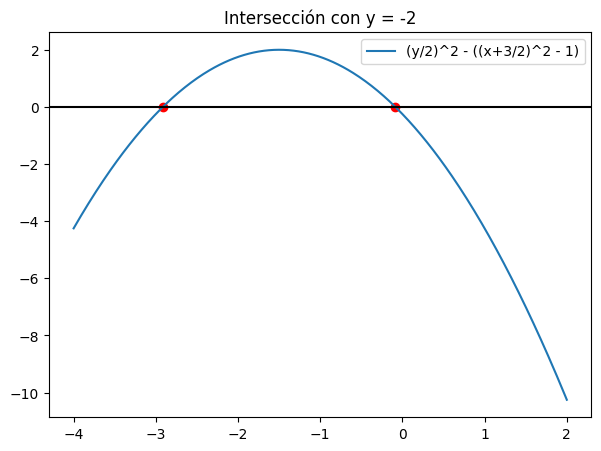

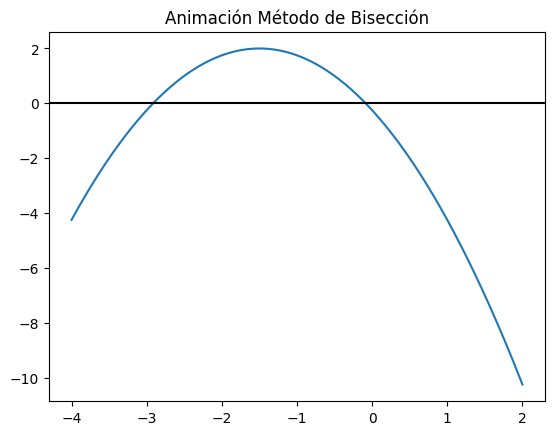

Puntos de intersección en x: [-2.914213562371515, -0.08578643762848515]


In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from matplotlib.animation import FuncAnimation


def f(x):
    return ( (-2)/2 )**2 - ((x + 1.5)**2 - 1) #funcion en terminos de x


x = np.linspace(-4, 2, 400)
y = f(x)


raices = []
for a, b in [(-3, -2), (-2, 0), (0, 1)]: # encontramos puntos de corte
    if f(a)*f(b) < 0:
        r = optimize.bisect(f, a, b)
        raices.append(r)

# funcion para los graficamos
fig, ax = plt.subplots(figsize=(7, 5)) 
ax.plot(x, y, label="(y/2)^2 - ((x+3/2)^2 - 1)")
ax.axhline(0, color='black')
ax.scatter(raices, [0]*len(raices), color='red')
ax.set_title("Interseccion con y = -2")
ax.legend()
plt.show()

# proceso de biseccion
a, b = -3, 0
frames = []
for _ in range(8):
    m = (a + b) / 2
    frames.append(m)
    if f(a)*f(m) < 0:
        b = m
    else:
        a = m

fig, ax = plt.subplots()
ax.plot(x, y)
ax.axhline(0, color='k')
line, = ax.plot([], [], 'ro-')
ax.set_title("Animacion Metodo de Biseccion")

def update(i):
    line.set_data(frames[:i], [f(xx) for xx in frames[:i]])
    return line,

ani = FuncAnimation(fig, update, frames=len(frames), interval=800, blit=True)
plt.show()

print("Puntos de interseccion en x:", raices)

*3. Dada la funcion*

$f(x) = (sin(x)/x)$

*Apartir de que valor $xt$ se cumple que $f(x)< 0.015,∀x >=  xT$*

Valor aproximado de xT: 21.660238797884404


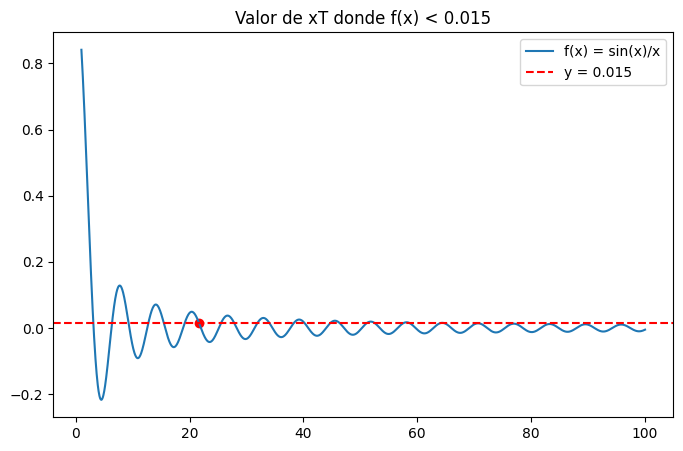

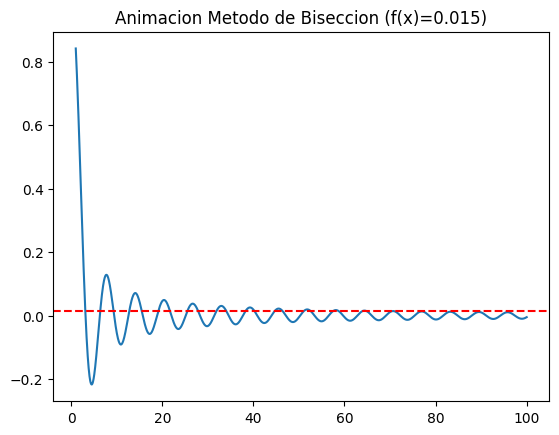

In [9]:

import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from matplotlib.animation import FuncAnimation

def f(x):
    return np.sin(x)/x


def g(x):
    return f(x) - 0.015 # condicion de f(x) = 0.015

x = np.linspace(1, 100, 2000)
y = f(x)


xT = optimize.bisect(g, 20, 30)  # punto de interseccion de f(x) con 0.015
print("Valor aproximado de xT:", xT)


fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(x, y, label="f(x) = sin(x)/x")
ax.axhline(0.015, color='r', linestyle='--', label="y = 0.015")
ax.scatter(xT, f(xT), color='red')
ax.legend()
ax.set_title("Valor de xT donde f(x) < 0.015")
plt.show()

# proceso de biseccion
a, b = 20, 30
frames = []
for _ in range(8):
    m = (a + b)/2
    frames.append(m)
    if g(a)*g(m) < 0:
        b = m
    else:
        a = m

fig, ax = plt.subplots()
ax.plot(x, y)
ax.axhline(0.015, color='r', linestyle='--')
line, = ax.plot([], [], 'ro-')
ax.set_title("Animacion Metodo de Biseccion (f(x)=0.015)")

def update(i):
    line.set_data(frames[:i], [f(xx) for xx in frames[:i]])
    return line,

ani = FuncAnimation(fig, update, frames=len(frames), interval=800, blit=True)
plt.show()


**link del repositorio de git-hub**

https://github.com/JuanfranPinto/Metodos-Numericos-
